## Dataset
https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

## References
https://aclanthology.org/C14-1008.pdf


In [109]:
shuffle = False
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('./movie.csv', sep=",")
X = dataset["text"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, shuffle=shuffle)

X_train, y_train

(0       I grew up (b. 1965) watching and loving the Th...
 1       When I put this movie in my DVD player, and sa...
 2       Why do people who do not know what a particula...
 3       Even though I have great interest in Biblical ...
 4       Im a die hard Dads Army fan and nothing will e...
                               ...                        
 3995    It aired on TV yesterday, so I decided to chec...
 3996    The only reason I bought the DVD was to satisf...
 3997    I ordered this extremely rare and highly overr...
 3998    A few weeks ago the German broadcaster "SAT1" ...
 3999    Every second of the film is gorgeous. And that...
 Name: text, Length: 4000, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 3995    1
 3996    0
 3997    0
 3998    0
 3999    1
 Name: label, Length: 4000, dtype: int64)

## Approach 1 - RRN

In [110]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [125]:
print(len(("".join(X_train.tolist())).split(" ")))

922951


In [130]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input

vectorize_layer = TextVectorization(max_tokens=922951)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=32))

model.add(LSTM(32, activation='softsign'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_55 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding_40 (Embedding)    (None, None, 32)          1451232   
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,460,097
Trainable params: 1,460,097
Non-trainable params: 0
___________________________________________

In [131]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[history_Adam, early_stopping])

Epoch 1/100
125/125 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5085

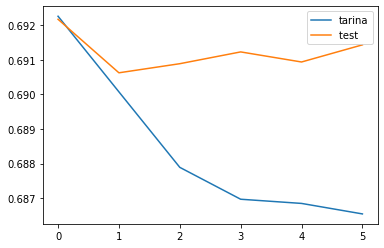

In [121]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

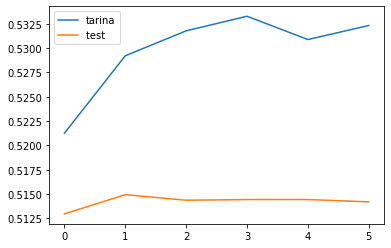

In [122]:
plt.plot(history_Adam.history['accuracy'], label = "tarina")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()
